## CHECK24

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [48]:
#Importing data
df = pd.read_csv('TSData.csv')
df.index = pd.DatetimeIndex(freq = "m", start = '1-1-2015', periods = 35)
#Printing head
df.head()

,Time,Clicks,Cost,Conversions,Revenue
2015-01-31,Jan-2015,96022,11111,1125,403879
2015-02-28,Feb-2015,68026,7971,842,309270
2015-03-31,Mar-2015,61759,7038,765,273198
2015-04-30,Apr-2015,65702,8237,852,280289
2015-05-31,May-2015,101667,14256,1323,467208


In [49]:
df

,Time,Clicks,Cost,Conversions,Revenue
2015-01-31,Jan-2015,96022,11111,1125,403879
2015-02-28,Feb-2015,68026,7971,842,309270
2015-03-31,Mar-2015,61759,7038,765,273198
2015-04-30,Apr-2015,65702,8237,852,280289
2015-05-31,May-2015,101667,14256,1323,467208
2015-06-30,Jun-2015,100188,12966,1423,479676
2015-07-31,Jul-2015,101985,13214,1501,522677
2015-08-31,Aug-2015,129191,18932,1636,570994
2015-09-30,Sep-2015,130525,17080,1648,599458
2015-10-31,Oct-2015,458588,110796,5090,1358071


In [50]:
df.shape

(35, 5)

In [51]:
revenue_df = df[['Time','Revenue']]

In [52]:
revenue_train=revenue_df[0:28]

In [53]:
revenue_test=revenue_df[28:]

In [54]:
revenue_test

,Time,Revenue
2017-05-31,May-2017,1632416
2017-06-30,Jun-2017,1635818
2017-07-31,Jul-2017,1553642
2017-08-31,Aug-2017,1509358
2017-09-30,Sep-2017,1487112
2017-10-31,Oct-2017,1927137
2017-11-30,Nov-2017,2990585


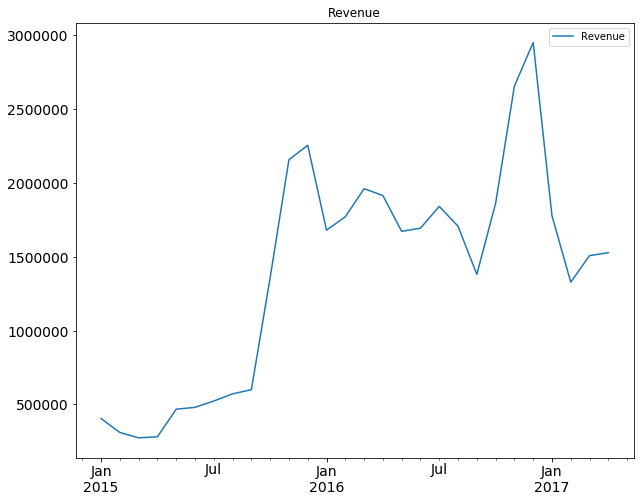

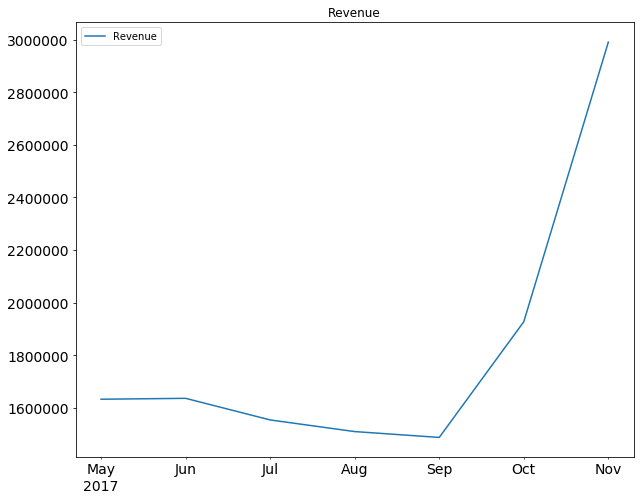

In [55]:
revenue_train.plot(figsize=(10,8), title= 'Revenue', fontsize=14)
revenue_test.plot(figsize=(10,8), title= 'Revenue', fontsize=14)
plt.show()

In [56]:
revenue_train.drop(['Time'], axis = 1)

,Revenue
2015-01-31,403879
2015-02-28,309270
2015-03-31,273198
2015-04-30,280289
2015-05-31,467208
2015-06-30,479676
2015-07-31,522677
2015-08-31,570994
2015-09-30,599458
2015-10-31,1358071


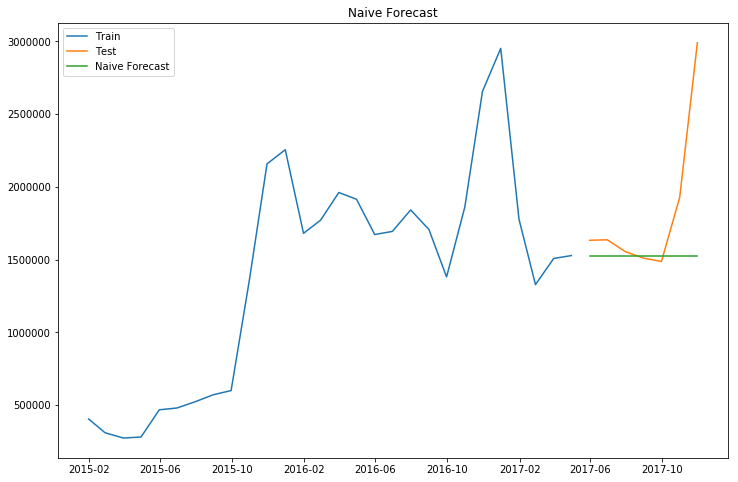

In [57]:
dd= np.asarray(revenue_train.Revenue)
y_hat = revenue_test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(revenue_train.index, revenue_train['Revenue'], label='Train')
plt.plot(revenue_test.index,revenue_test['Revenue'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [58]:
rms = sqrt(mean_squared_error(revenue_test.Revenue, y_hat.naive))
print(rms)

576473.8929731089


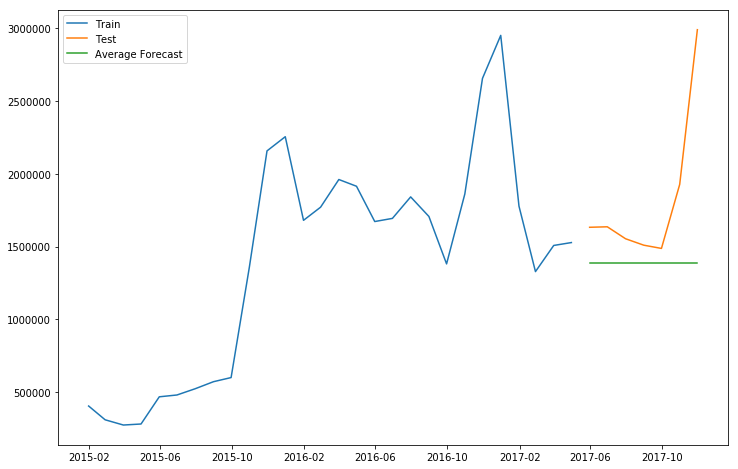

In [59]:
y_hat_avg = revenue_test.copy()
y_hat_avg['avg_forecast'] = revenue_train['Revenue'].mean()
plt.figure(figsize=(12,8))
plt.plot(revenue_train['Revenue'], label='Train')
plt.plot(revenue_test['Revenue'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [60]:
rms = sqrt(mean_squared_error(revenue_test.Revenue, y_hat_avg.avg_forecast))
print(rms)

657158.7154741493


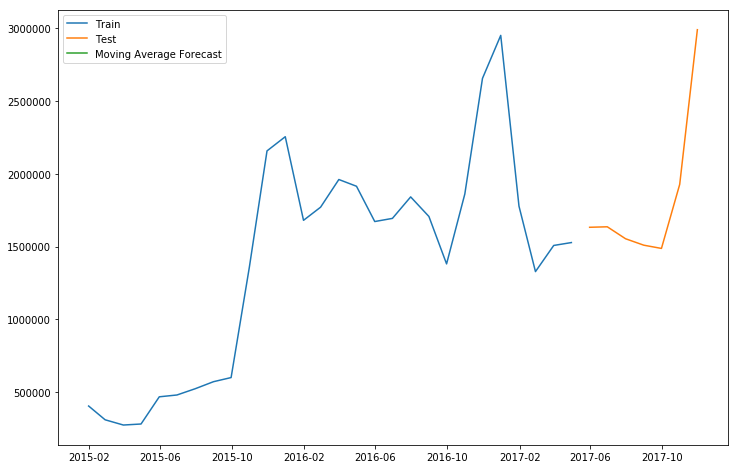

In [69]:
y_hat_avg = revenue_test.copy()
y_hat_avg['moving_avg_forecast'] = revenue_train['Revenue'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(12,8))
plt.plot(revenue_train['Revenue'], label='Train')
plt.plot(revenue_test['Revenue'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

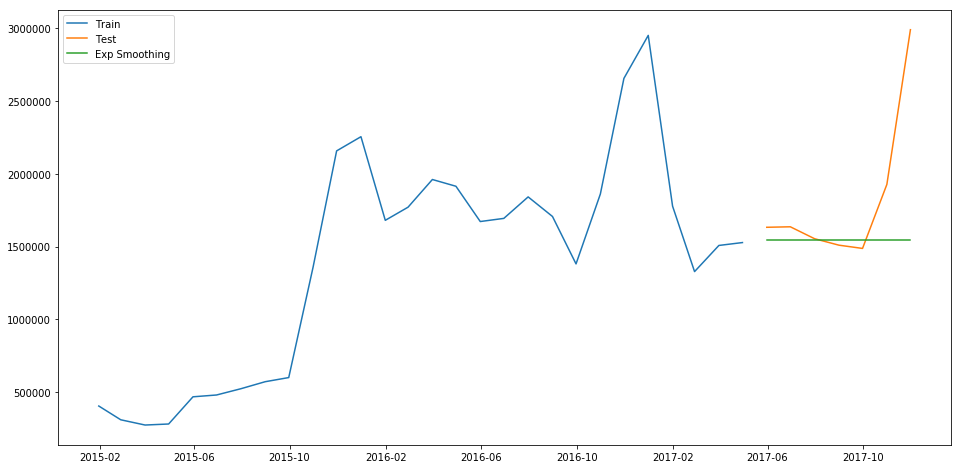

In [72]:
y_hat_avg = revenue_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(revenue_train['Revenue'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(revenue_test))
plt.figure(figsize=(16,8))
plt.plot(revenue_train['Revenue'], label='Train')
plt.plot(revenue_test['Revenue'], label='Test')
plt.plot(y_hat_avg['SES'], label='Exp Smoothing')
plt.legend(loc='best')
plt.show()

In [74]:
rms = sqrt(mean_squared_error(revenue_test.Revenue, y_hat_avg.SES))
print(rms)

568867.3535446988


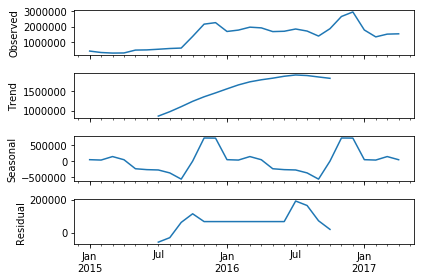

In [61]:
decomp = sm.tsa.seasonal_decompose(revenue_train.Revenue)
fig = decomp.plot()
plt.show()
result = sm.tsa.stattools.adfuller(revenue_train.Revenue)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


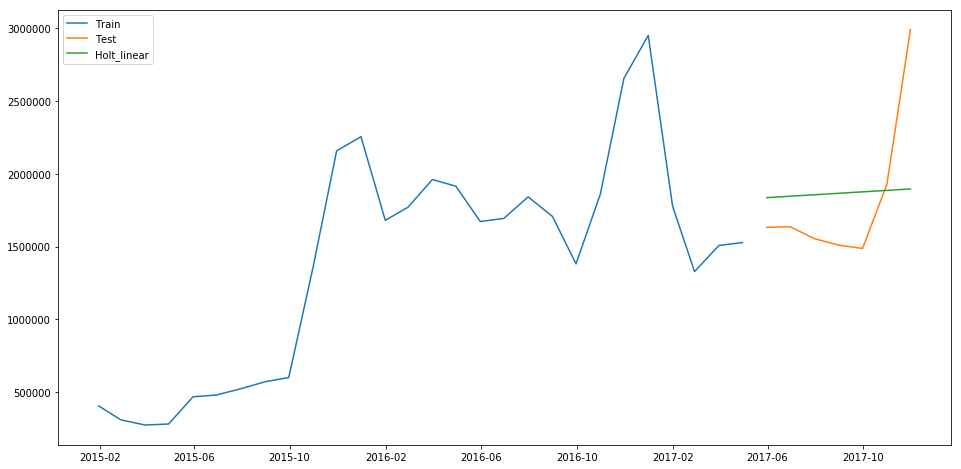

In [62]:
y_hat_avg = revenue_test.copy()
revenue_train['Revenue'] = revenue_train['Revenue'].astype(np.float64)
fit1 = Holt(np.asarray(revenue_train['Revenue'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(revenue_test))

plt.figure(figsize=(16,8))
plt.plot(revenue_train['Revenue'], label='Train')
plt.plot(revenue_test['Revenue'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [63]:
y_hat_avg

,Time,Revenue,Holt_linear
2017-05-31,May-2017,1632416,1.836120e+06
2017-06-30,Jun-2017,1635818,1.846100e+06
2017-07-31,Jul-2017,1553642,1.856081e+06
2017-08-31,Aug-2017,1509358,1.866061e+06
2017-09-30,Sep-2017,1487112,1.876041e+06
2017-10-31,Oct-2017,1927137,1.886021e+06
2017-11-30,Nov-2017,2990585,1.896001e+06


In [64]:
rms = sqrt(mean_squared_error(revenue_test.Revenue, y_hat_avg.Holt_linear))
print(rms)

486311.1303540439


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/statsmodels-0.10.0.dev0+874.g4a79c2848-py3.6-macosx-10.7-x86_64.egg/statsmodels/tsa/holtwinters.py:713: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


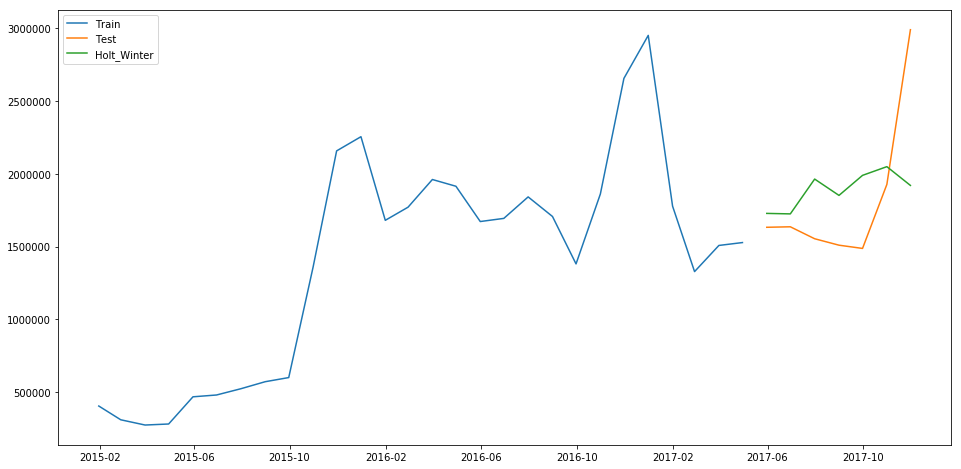

In [65]:
y_hat_avg = revenue_test.copy()
revenue_train['Revenue'] = revenue_train['Revenue'].astype(np.float64)

fit1 = ExponentialSmoothing(np.asarray(revenue_train['Revenue']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(revenue_test))
plt.figure(figsize=(16,8))
plt.plot( revenue_train['Revenue'], label='Train')
plt.plot(revenue_test['Revenue'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [66]:
rms = sqrt(mean_squared_error(revenue_test.Revenue, y_hat_avg.Holt_Winter))
print(rms)


495010.93777419976


In [67]:
y_hat_avg = revenue_test.copy()
revenue_train['Revenue'] = revenue_train['Revenue'].astype(np.float64)

fit1 = sm.tsa.statespace.SARIMAX(revenue_train.Revenue, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
#y_hat_avg['SARIMA'] = fit1.predict(start="2017-5-31", end="2017-11-30", dynamic=True)
#plt.figure(figsize=(16,8))
#plt.plot( revenue_train['Revenue'], label='Train')
#plt.plot(revenue_test['Revenue'], label='Test')
#plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
#plt.legend(loc='best')
#plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/statsmodels-0.10.0.dev0+874.g4a79c2848-py3.6-macosx-10.7-x86_64.egg/statsmodels/tsa/statespace/sarimax.py:960: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ValueError: maxlag should be < nobs